In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

The dataset consists of 10 000 data points stored as rows with 14 features in columns

**UID**: unique identifier ranging from 1 to 10000

**productID**: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number

**Type**: L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants. 

**air temperature**: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

**process temperature**: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

**rotational speed**: calculated from powepower of 2860 W, overlaid with a normally distributed noise

**torque**: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
           <p style="color:gray">*Torque is a measure of the force that can cause an object to rotate about an axis. Just as force is what causes an object to accelerate in linear kinematics, torque is what causes an object to acquire angular acceleration.*</p>
        

**tool wear**: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

**Target** : Failure or Not

**Failure Type** : Type of Failure

<span style="color:gray">*Source : Kaggle*</span>

In [2]:
df = pd.read_csv("predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


# EDA

### Nulls values

In [4]:
pd.DataFrame({'features':df.isnull().sum().index, 'num_of_nans':df.isnull().sum().values})

,features,num_of_nans
0,UDI,0
1,Product ID,0
2,Type,0
3,Air temperature [K],0
4,Process temperature [K],0
5,Rotational speed [rpm],0
6,Torque [Nm],0
7,Tool wear [min],0
8,Target,0
9,Failure Type,0


### Shape

In [5]:
print(f'The shape of the dataframe is : {df.shape}')

The shape of the dataframe is : (10000, 10)


### Unique values

In [6]:
pd.DataFrame({'features':df.nunique().index, 'num_of_uniques':df.nunique().values})

,features,num_of_uniques
0,UDI,10000
1,Product ID,10000
2,Type,3
3,Air temperature [K],93
4,Process temperature [K],82
5,Rotational speed [rpm],941
6,Torque [Nm],577
7,Tool wear [min],246
8,Target,2
9,Failure Type,6


### Plot features

In [7]:
#Select numerical and categorical columns
#Without the the UDI and the ProductID because those are just ids

num_columns = df.select_dtypes(include='number').columns.delete([0])
cat_columns = df.select_dtypes(include='object').columns.delete([0])


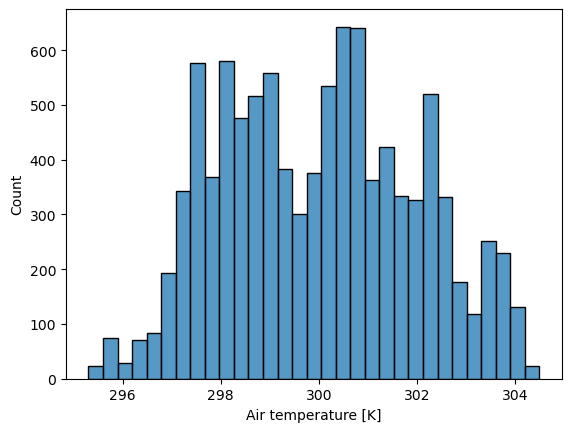

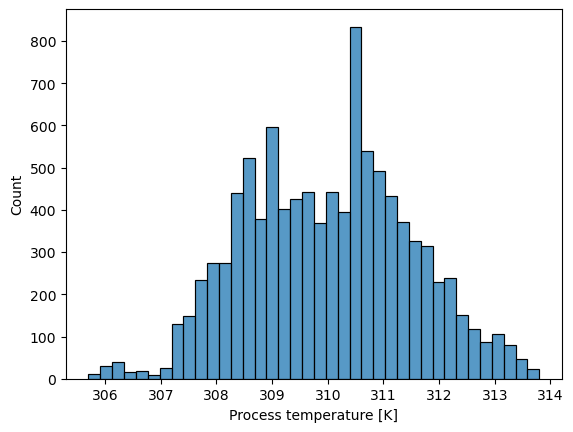

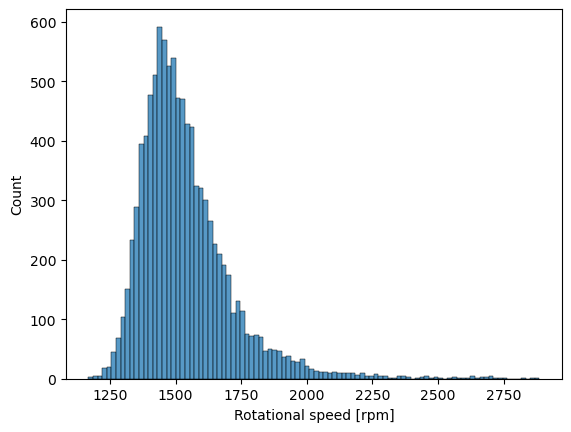

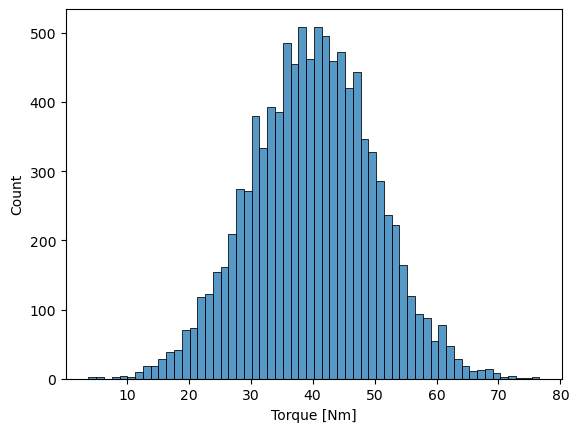

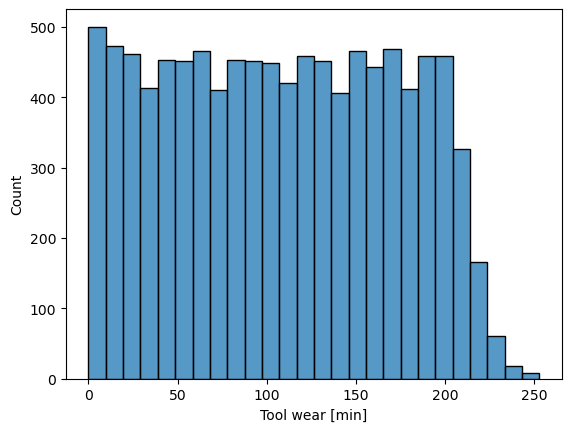

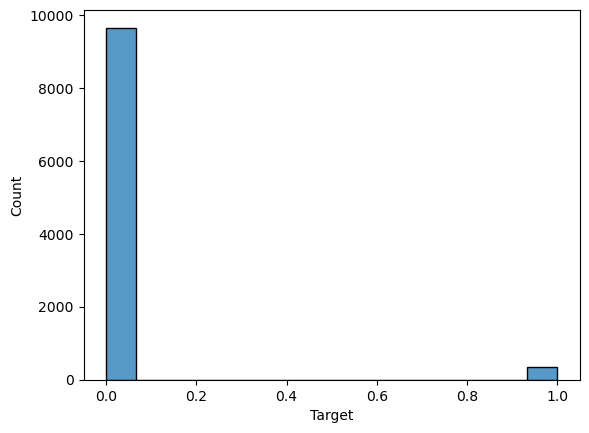

In [8]:
#Plot histogramme of numerical columns

for col in num_columns:
    plt.figure()
    sns.histplot(data=df, x=col)
    plt.show()

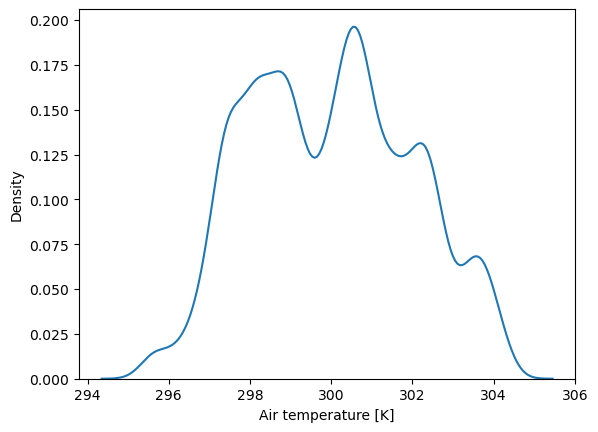

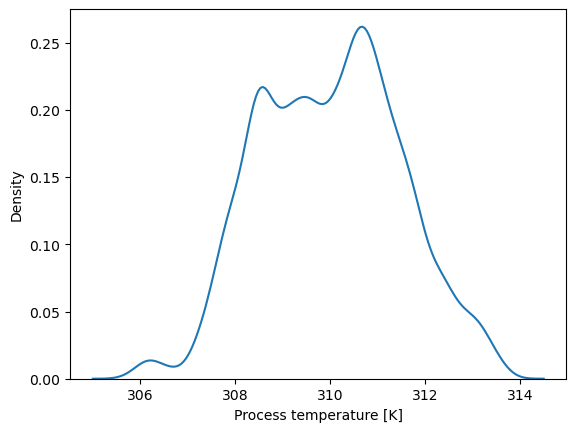

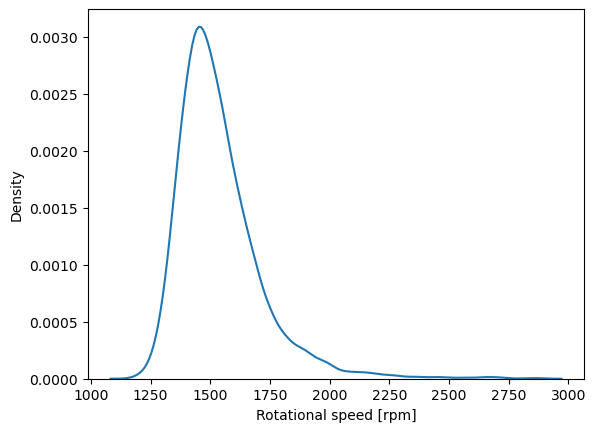

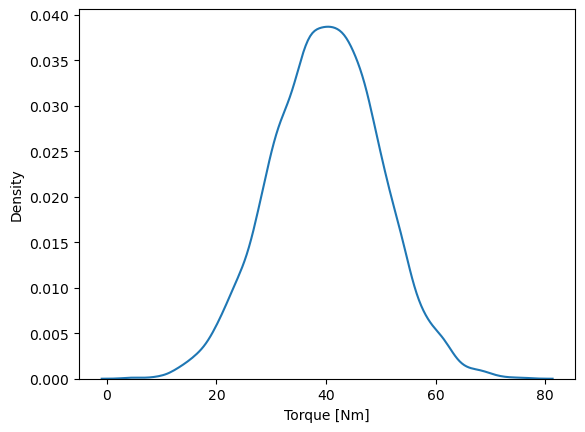

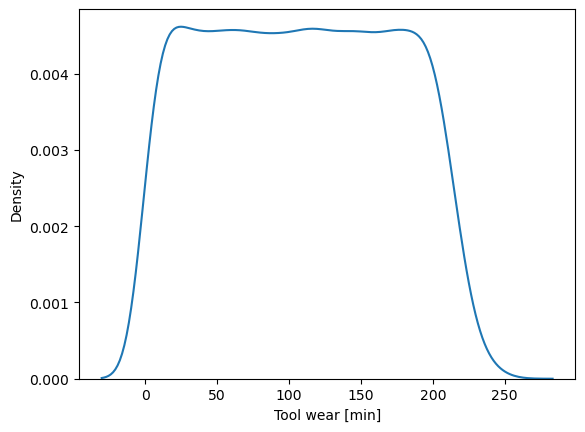

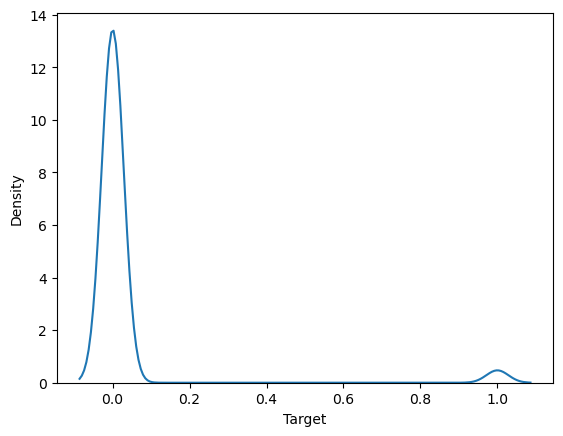

In [9]:
#Using the kernel plot to have a more clear look at the distribution of our features

for col in num_columns:
    plt.figure()
    sns.kdeplot(data=df, x=col)
    plt.show()


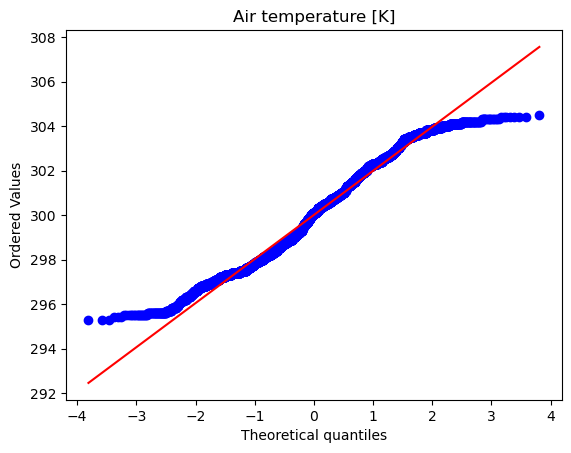

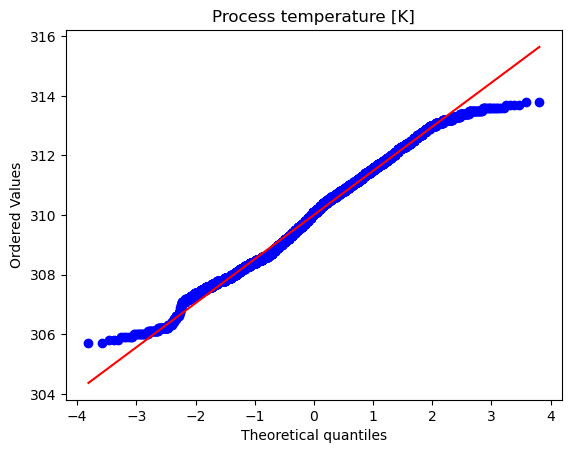

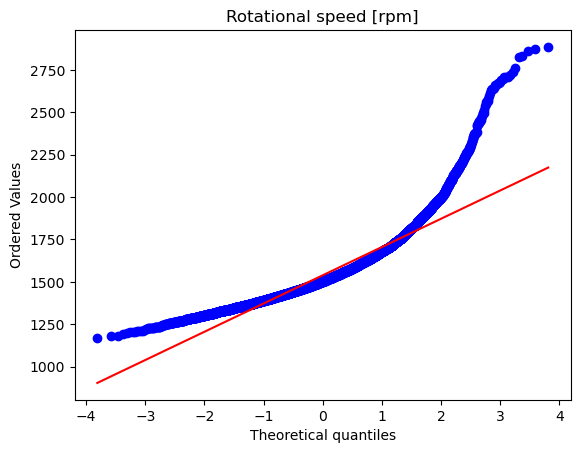

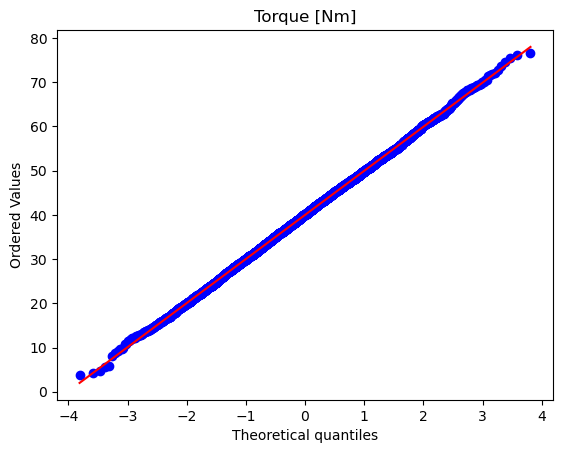

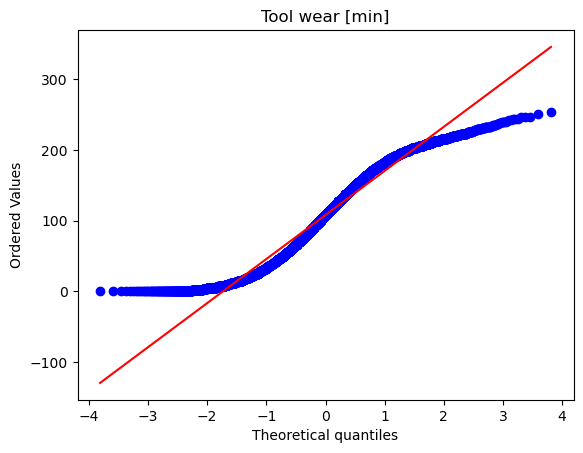

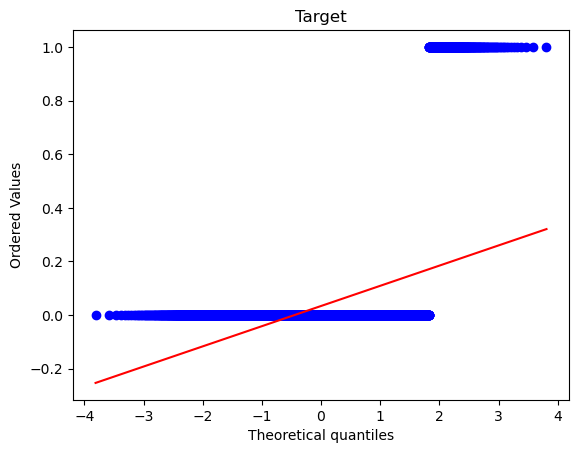

In [10]:
#Using Q-Q plot to verify the normality of our features

for col in num_columns:
    plt.figure()
    stats.probplot(df[col], dist="norm", plot=pylab)
    plt.title(col)
    plt.show()


**-** For the ***Target*** variable is a binary variable so it will not follow a normal distribution.

**-** The ***Torque*** feature follows a normal distribution perfectly (we can use a statistical test to verify this).

**-** ***The Process temperature***, ***Tool wear*** and ***Air temperature*** resemble a normal distribution so we can **standardize (StandardScaler)** those features before feeding it to a model to generate a good result.

**-** On the other hand, ***Rotational speed*** clearly doesn't follow a normal distribution so we will use **Box-Cox** to normalize it.

<span style="color:gray">*Note: We can use here **Box-Cox** to normalize the ***Rotational speed*** variable because all values of this variable are strictly greater than zero(min value is 1168), if it, not the case we should use **Yeo-Johnson transform** *</span>





from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

data = data.reshape(-1, 1)

pt.fit(data)

transformed_data = pt.transform(data)

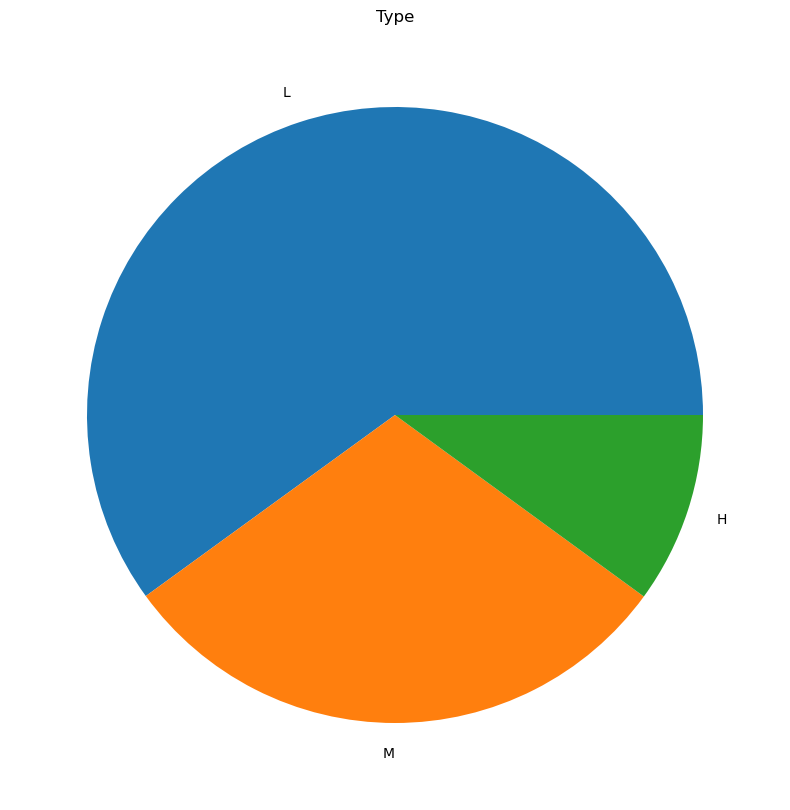

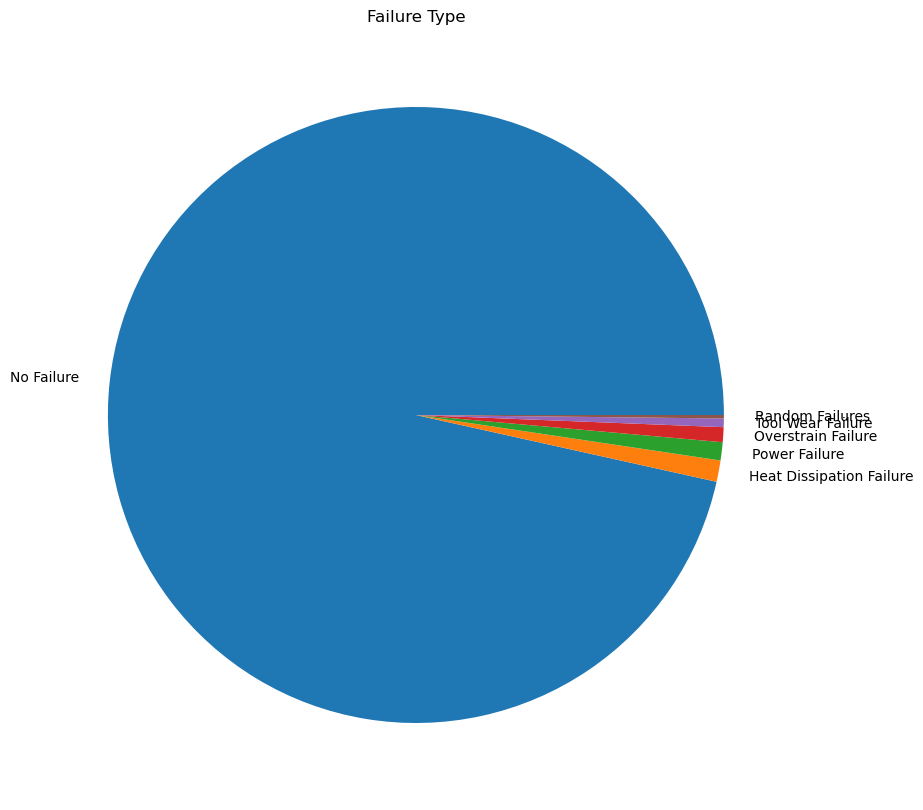

In [21]:
#Plot histogramme of categorical columns

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

for col in cat_columns:
    plt.figure(figsize=(10, 10))
    plt.pie(df[col].value_counts().values, labels=df[col].value_counts().index)
    plt.title(col)
    plt.show()
    

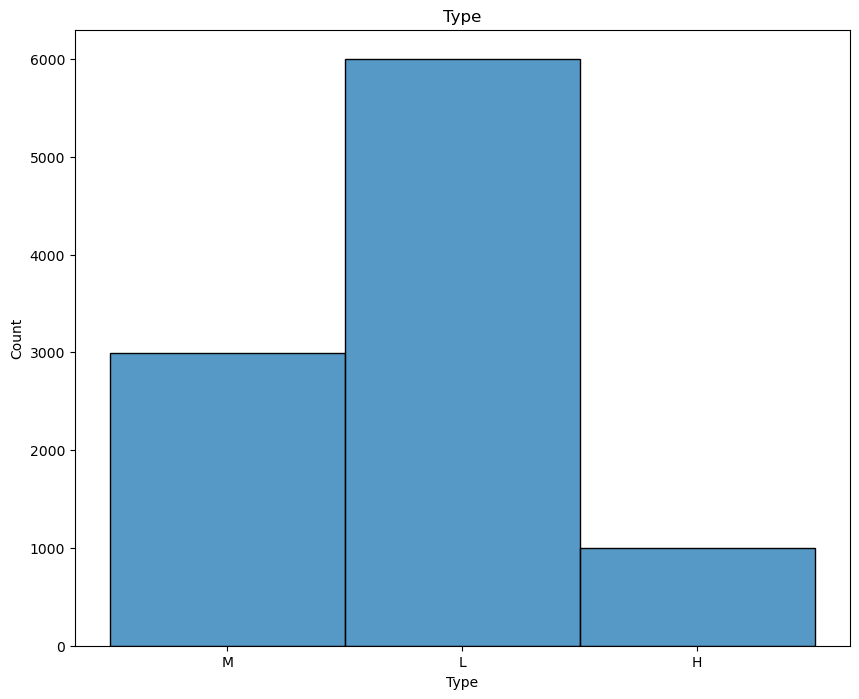

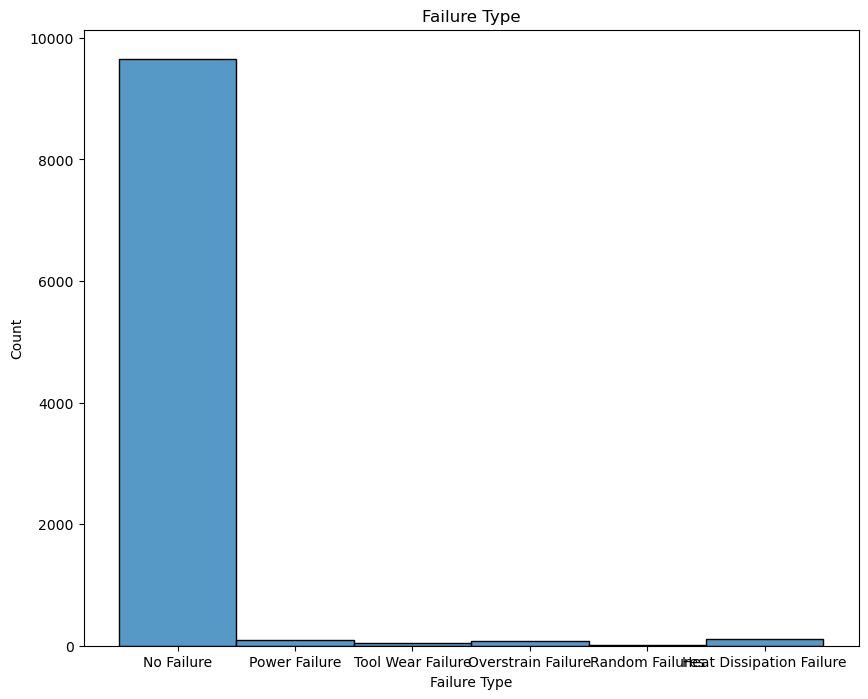

In [22]:
for col in cat_columns:
    plt.figure(figsize=(10, 8))
    sns.histplot(data=df, x=col)
    plt.title(col)
    plt.show()

- We can see that the majority of our products are from the low quality

- We can see also that in most of the time we don't have any failure

In [25]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [38]:

for col in cat_columns:
    print("Column : " + col)
    display(pd.DataFrame({'item':df[col].value_counts().index, 'item_freq':df[col].value_counts().values}))
    print("=" * 50)
    print("\n")

Column : Type


,item,item_freq
0,L,6000
1,M,2997
2,H,1003




Column : Failure Type


,item,item_freq
0,No Failure,9652
1,Heat Dissipation Failure,112
2,Power Failure,95
3,Overstrain Failure,78
4,Tool Wear Failure,45
5,Random Failures,18


### Correlation

<AxesSubplot:>

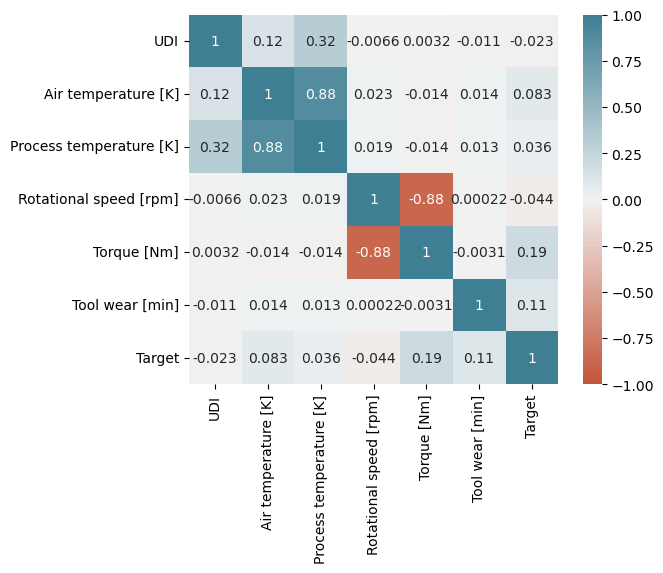

In [50]:
sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)

- Correlation between "Process temperature [K]" and "Air temperature [K]" (make sense because both themes affect each other)
- Correlation between "Rotational speed [rpm]" and "Torque [Nm]" (make sense also because : 𝜏=P/ω with 𝜏 is torque value(in Nm), P is the power(in W) and w is  angular speed (in rad/sec with 1rpm = 0.10471975511965977 rad/s)

### Outliers

In [ ]:
def generate_scores(mean=60,std_dev=12,num_samples=200):
    np.random.seed(27)
    scores = np.random.normal(loc=mean,scale=std_dev,size=num_samples)
    scores = np.round(scores, decimals=0)
    return scores

scores_data = generate_scores()